In [1]:
import os, pickle
# import pandas as pd
import numpy as np
# from scipy import stats
# from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
# from sklearn.metrics.pairwise import euclidean_distances
# from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
import torchvision
import torch
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings("ignore")
import models.utils as utils
import csv

from torchvision import transforms, models
import evals.teaching_evals as evals
import pickle
import figs.plot_data as plot

In [2]:

dataset = torchvision.datasets.ImageFolder("/net/scratch/tianh-shared/chest_xray/test")
# transform=utils.xray_transform())
# dataloader = torch.utils.data.DataLoader(
#     dataset, 
#     batch_size=len(dataset), 
#     num_workers=self.hparams.dataloader_num_workers, 
#     drop_last=False, shuffle=False)

In [7]:
dataset

Dataset ImageFolder
    Number of datapoints: 624
    Root location: /net/scratch/tianh-shared/chest_xray/test

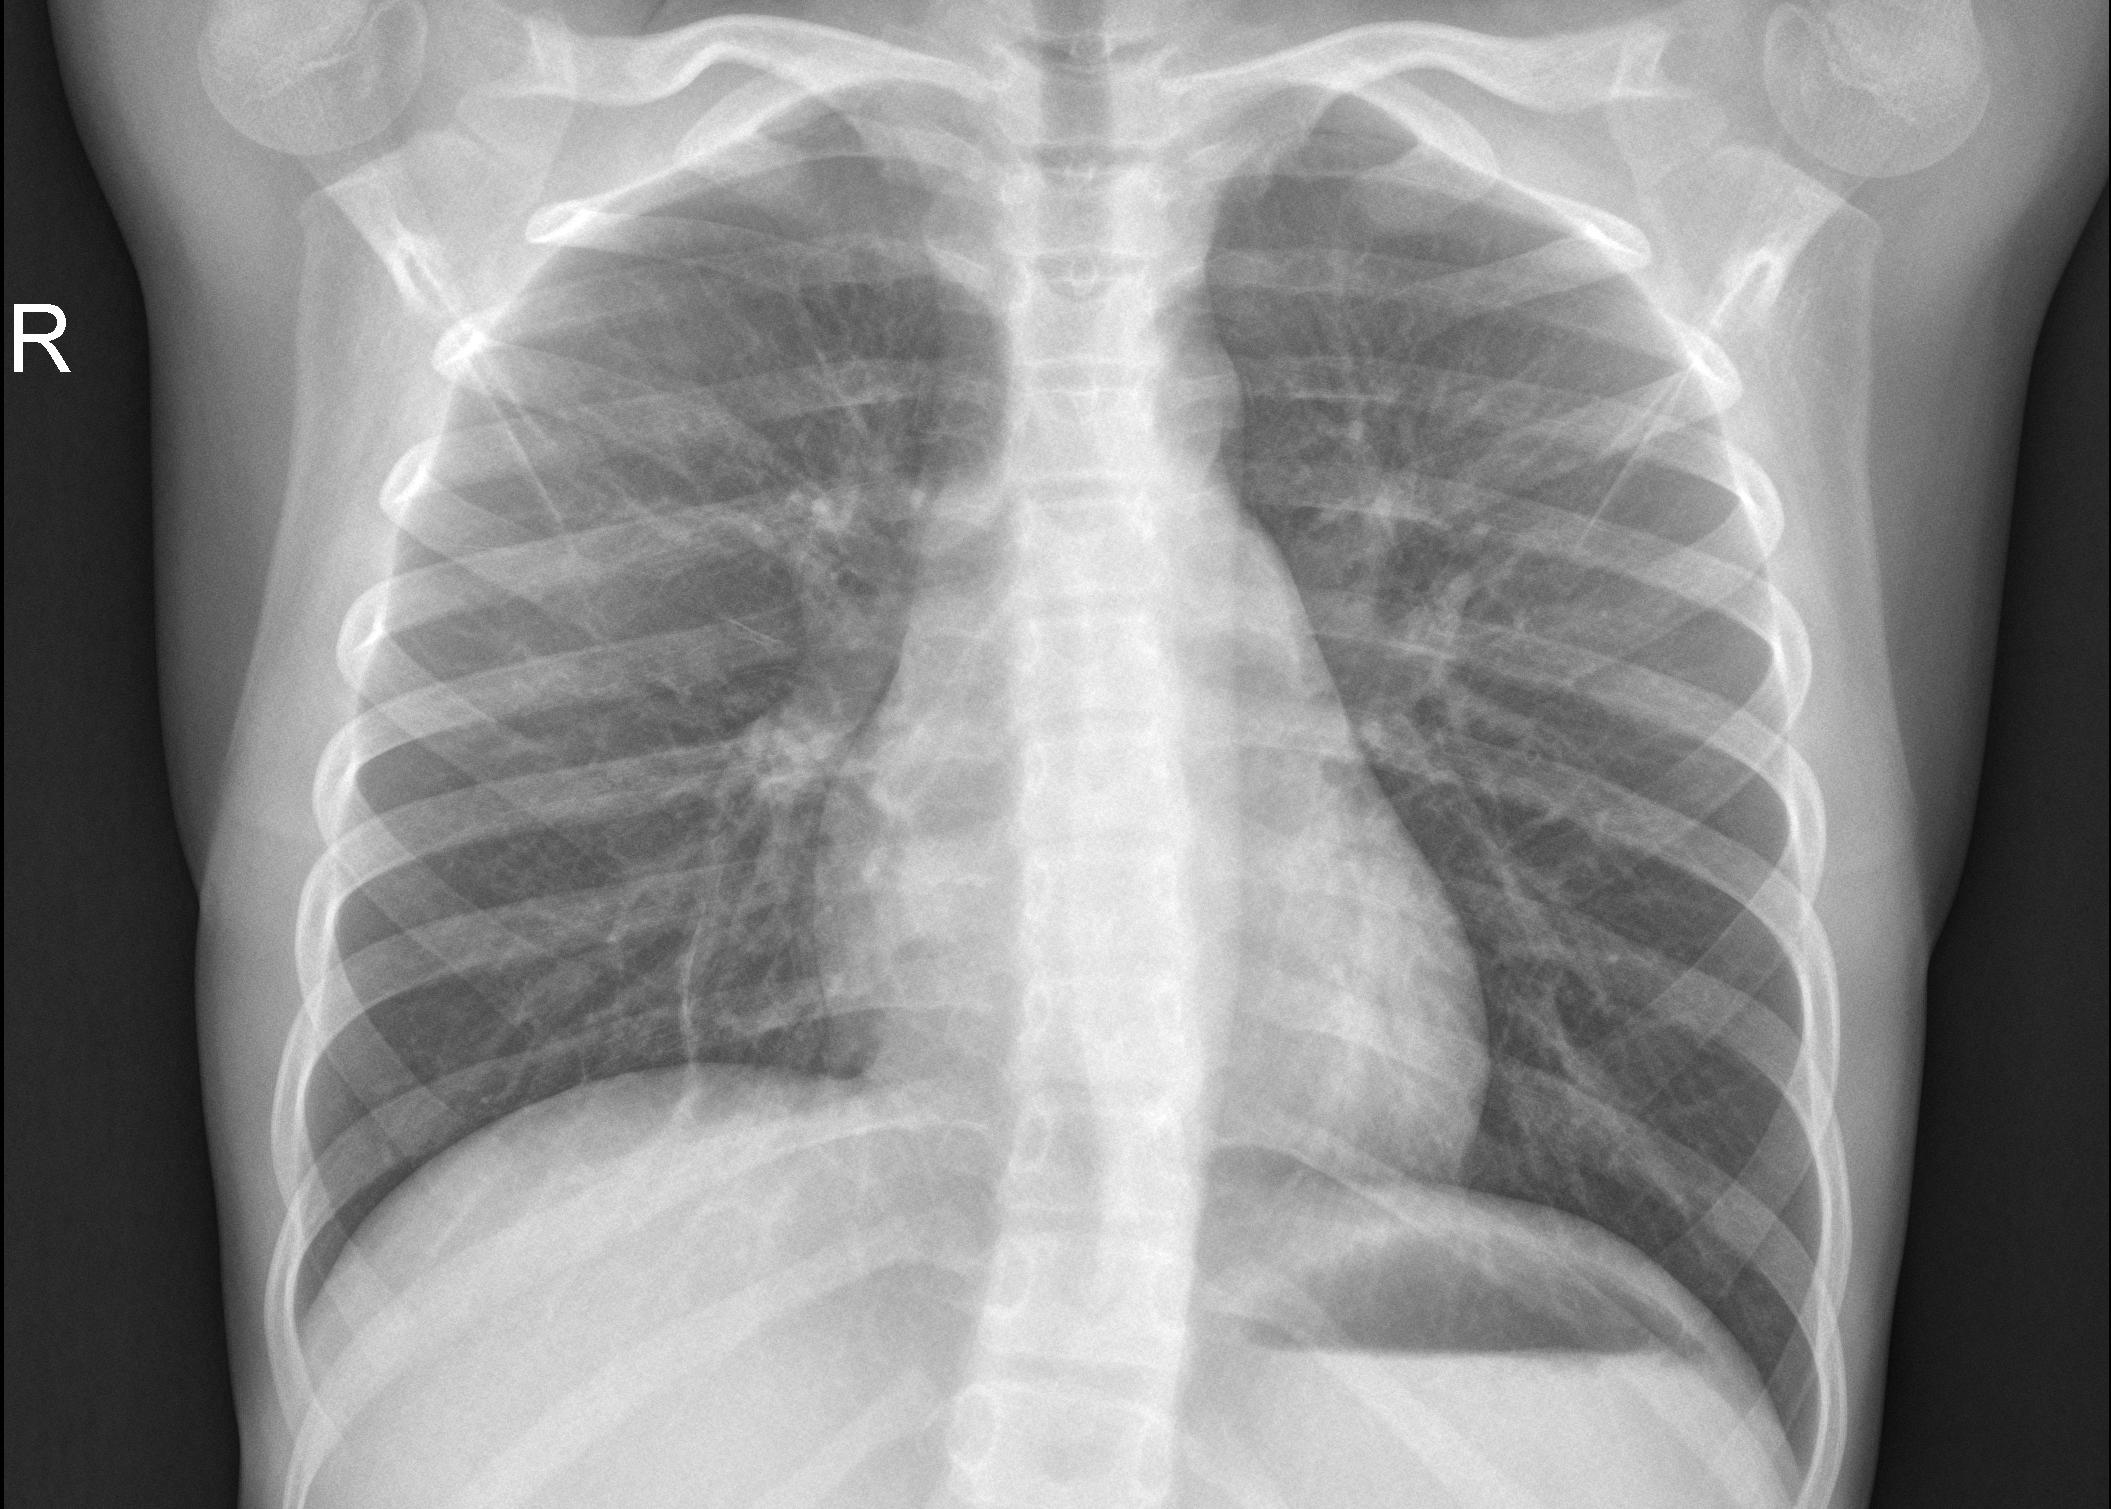

In [16]:
dataset[1][0]

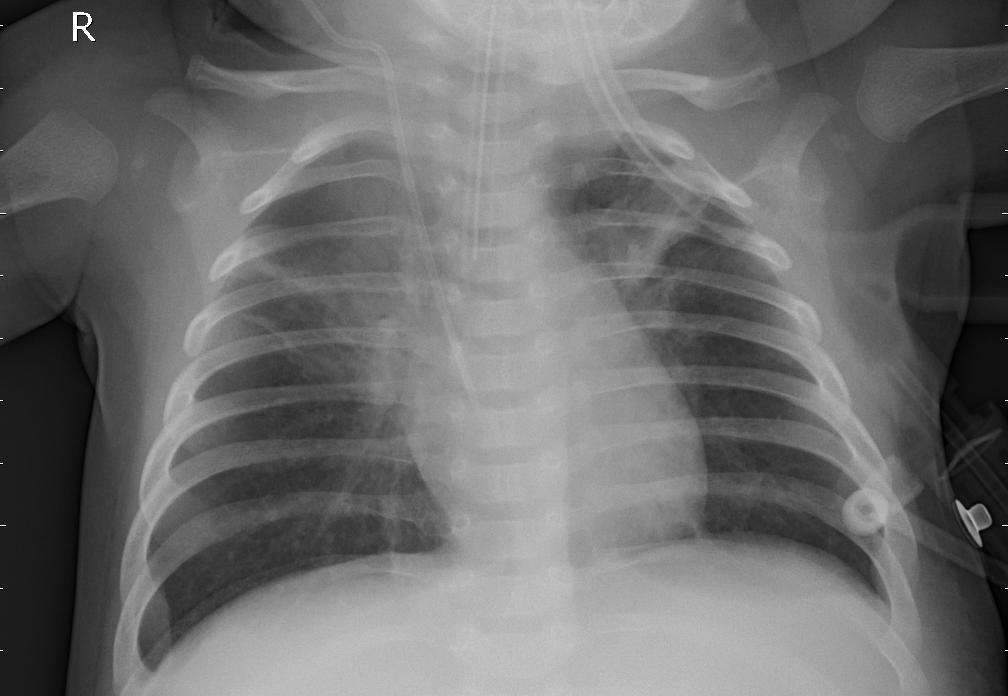

In [17]:
dataset[601][0]

In [30]:
class person():
    def __init__(self, shit):
        self.shit = shit
        self.ha()

    def ha(self):
        return 111111

In [31]:
class me(person):
    def __init__(self, shit):
        super().__init__(shit)
        self.a = super().ha()
        print(self.a)


In [32]:
b = me(1)

111111


In [4]:
import numpy as np
from sklearn.model_selection import KFold

b = np.arange(80)
m = np.arange(80,160)
train_idx = []*4
valid_idx = []*4
kf = KFold(n_splits=4, shuffle=True)
for i, (train, test) in enumerate(kf.split(b)):
    print(train)
    print(test)

[ 1  3  4  6  7  9 10 11 12 13 14 15]
[0 2 5 8]
[ 0  2  3  4  5  8  9 10 11 12 13 14]
[ 1  6  7 15]
[ 0  1  2  3  4  5  6  7  8 11 14 15]
[ 9 10 12 13]
[ 0  1  2  5  6  7  8  9 10 12 13 15]
[ 3  4 11 14]


In [6]:
lambdas = np.arange(0.1, 1, 0.1)
clf = [0.875, 0.925, 0.95, 0.975, 0.975, 0.975, 1, 1, 0.975]
triplet = [0.897,0.913,0.913,0.855,0.841,0.826,0.841,0.841,0.841]

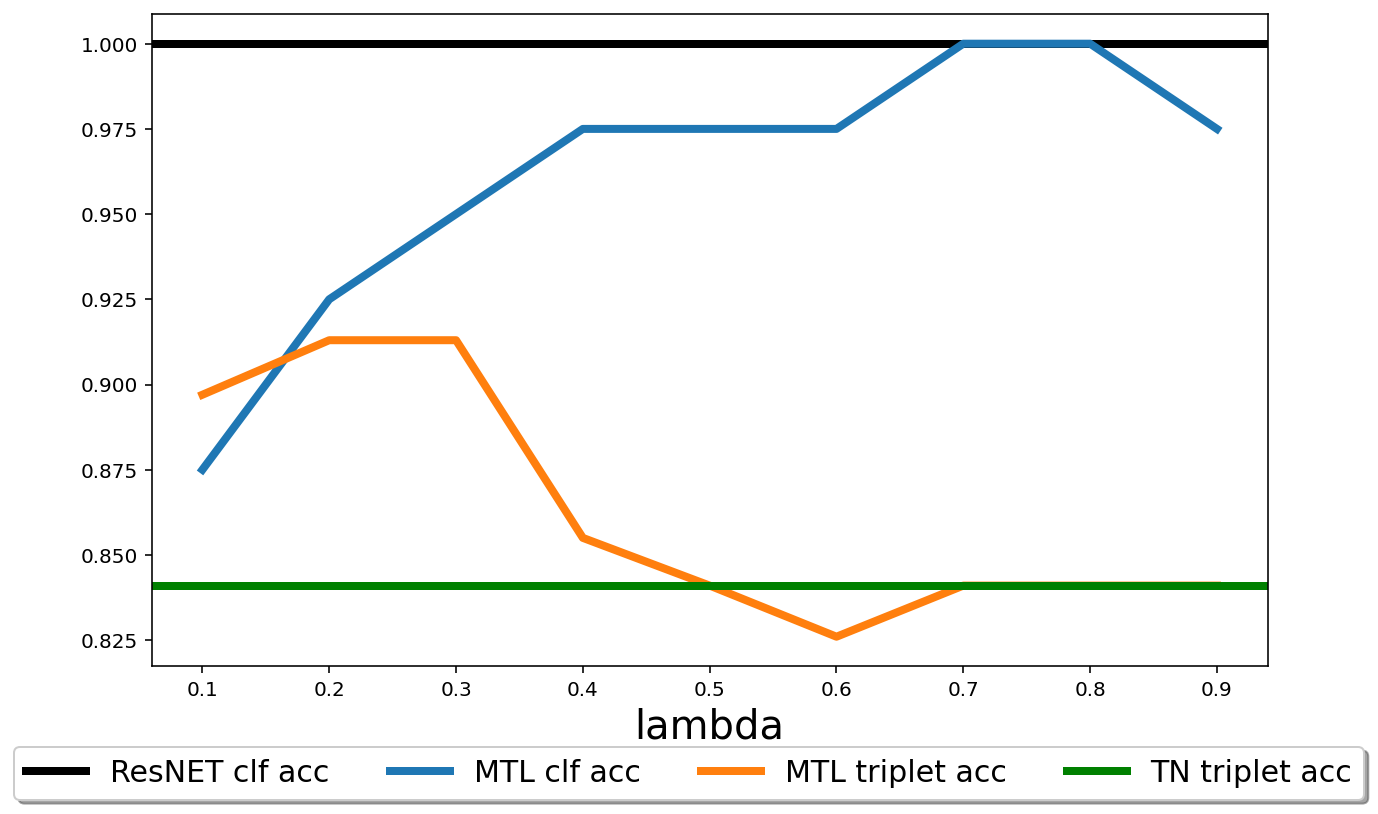

In [13]:
lw=4
plt.rc('legend', fontsize=15)
plt.figure(figsize=(10,6))
plt.axhline(1, c='black',linewidth=lw, label="ResNET clf acc")
plt.plot(lambdas, clf,linewidth=lw, label="MTL clf acc")
plt.plot(lambdas, triplet,linewidth=lw, label="MTL triplet acc")
plt.axhline(0.841, c='green',linewidth=lw, label="TN triplet acc")
plt.xlabel('lambda')
# plt.title("MTL trained on human triplets")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, -0.1),fancybox=True, shadow=True, ncol=4)
plt.savefig("figs/MTL_lambdas.pdf", format="pdf", bbox_inches="tight")

In [9]:

triplets = pickle.load(open("/net/scratch/tianh/triplet-webapp/backup/trial0/butterfly.triplets.pkl","rb"))

In [3]:
train_idx = pickle.load(open("data/bm_train_idx.pkl", "rb"))[1]
val_idx  = pickle.load(open("data/bm_valid_idx.pkl", "rb"))[1]

In [21]:
train_triplets = []
val_triplets = []
for triplet in triplets:
    a,p,n = triplet
    if a in train_idx.keys() and p in train_idx.keys() and n in train_idx.keys():
        new = [train_idx[a], train_idx[p], train_idx[n]]
        train_triplets.append(new)
    elif a in val_idx.keys() and p in val_idx.keys() and n in val_idx.keys():
        new = [val_idx[a], val_idx[p], val_idx[n]]
        val_triplets.append(new)

In [2]:

train_triplets = "/net/scratch/tianh/explain_teach/data/bm_triplets/3c2_unique=182/train_triplets.pkl"
valid_triplets = "/net/scratch/tianh/explain_teach/data/bm_triplets/3c2_unique=182/valid_triplets.pkl"
train_triplets = pickle.load(open(train_triplets, "rb"))
valid_triplets = pickle.load(open(valid_triplets, "rb"))

In [4]:

train_lpips_distance = "/net/scratch/tianh/explain_teach/embeds/lpips/lpips.bm.train.pkl"
valid_lpips_distance = "/net/scratch/tianh/explain_teach/embeds/lpips/lpips.bm.valid.pkl"
train_lpips_distance = pickle.load(open(train_lpips_distance, "rb"))
valid_lpips_distance = pickle.load(open(valid_lpips_distance, "rb"))

In [9]:
correct = 0
total = 0
for htriplet in train_triplets:
    total += 1
    a,p,n = htriplet[0], htriplet[1], htriplet[2]
    if train_lpips_distance[a, p] < train_lpips_distance[a, n]:
        correct += 1
correct/total


0.5769230769230769

In [8]:
correct = 0
total = 0
for htriplet in valid_triplets:
    total += 1
    a,p,n = htriplet[0], htriplet[1], htriplet[2]
    if valid_lpips_distance[a, p] < valid_lpips_distance[a, n]:
        correct += 1
correct/total


0.5507246376811594

In [5]:
# train_pairwise_distance= "embeds/lpips.bm.train.pkl" 
# valid_pairwise_distance= "embeds/lpips.bm.valid.pkl" 
# train_pairwise_distance = pickle.load(open(train_pairwise_distance, "rb"))
# valid_pairwise_distance = pickle.load(open(valid_pairwise_distance, "rb"))

train_triplets = "/net/scratch/tianh/explain_teach/data/bm_triplets/train_triplets.pkl"
valid_triplets = "/net/scratch/tianh/explain_teach/data/bm_triplets/valid_triplets.pkl"
train_triplets = pickle.load(open(train_triplets, "rb"))
valid_triplets = pickle.load(open(valid_triplets, "rb"))

In [7]:
train = pickle.load(open("embeds/TN_bm_train.pkl","rb"))
valid = pickle.load(open("embeds/TN_bm_valid.pkl","rb"))
triplets = pickle.load(open("data/bm_triplets/val2train_triplets.pkl","rb"))

In [8]:
acc = evals.val2train_triplet_acc(train, valid, triplets)
acc

100%|██████████| 508800/508800 [00:21<00:00, 23501.76it/s]


0.8758490566037735

In [9]:
acc = evals.triplet_acc(train, train_triplets)
acc

100%|██████████| 669920/669920 [00:29<00:00, 22594.10it/s]


0.8902451038930022

In [10]:
acc = evals.triplet_acc(valid, valid_triplets)
acc

100%|██████████| 9880/9880 [00:00<00:00, 23948.86it/s]


0.8486842105263158

In [34]:

train_triplets = "/net/scratch/tianh/bm/triplets/train_triplets.pkl"
valid_triplets = "/net/scratch/tianh/bm/triplets/valid_triplets.pkl"
# clf_train_triplets = "/net/scratch/tianh/bm/triplets/clf_train_triplets.pkl"
# clf_valid_triplets = "/net/scratch/tianh/bm/triplets/clf_valid_triplets.pkl"

train_triplets = pickle.load(open(train_triplets, "rb"))

In [39]:

train_dir = "/net/scratch/hanliu-shared/data/bm/train"
valid_dir = "/net/scratch/hanliu-shared/data/bm/valid"
train_dataset = torchvision.datasets.ImageFolder(train_dir, transform=utils.bm_transform())
valid_dataset = torchvision.datasets.ImageFolder(valid_dir, transform=utils.bm_transform())
train_inputs = torch.tensor(np.array([data[0].numpy() for data in train_dataset]))
valid_inputs = torch.tensor(np.array([data[0].numpy() for data in valid_dataset]))
train_labels = torch.tensor(np.array([data[1] for data in train_dataset]))
valid_labels = torch.tensor(np.array([data[1] for data in valid_dataset]))

In [42]:
np.where(train_labels==0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),)

In [13]:
a = pickle.load(open("/net/scratch/tianh/bm/triplets/clf_train_triplets.pkl","rb"))

In [3]:
idx = np.random.choice(len(combs), 32, replace=False)
sample = combs[idx]
len(np.unique(sample.flatten()))

65

In [4]:
import torch
a = torch.tensor(sample)

In [5]:
torch.unique(torch.flatten(a))

tensor([  7,   9,  10,  11,  12,  13,  14,  15,  18,  19,  21,  22,  29,  32,
         33,  34,  36,  38,  39,  40,  41,  42,  46,  55,  56,  57,  58,  61,
         63,  70,  72,  76,  82,  84,  86,  88,  90,  92,  93,  98,  99, 103,
        106, 108, 110, 111, 112, 113, 114, 115, 116, 117, 122, 129, 131, 132,
        133, 141, 142, 144, 145, 149, 151, 153, 155])

In [62]:
triplet_idx = []
for c in combs:
    x1, x2, x3 = c[0], c[1], c[2]
    if train_pairwise_distance[x1, x2] > train_pairwise_distance[x1, x3]:
        triplet_idx.append([x1, x3, x2])
    else:
        triplet_idx.append([x1, x2, x3])

In [64]:
pickle.dump(np.array(triplet_idx), open('/net/scratch/tianh/bm/triplets/train_triplets.pkl',"wb"))

In [65]:
a = pickle.load(open('/net/scratch/tianh/bm/triplets/train_triplets.pkl',"rb"))
a.shape

(669920, 3)

In [51]:
np.array(triplet_idx).shape

(669881, 3)

In [28]:
food100 = []
with open('/net/scratch/tianh/food100-dataset/all-triplets.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        food100.append(row)

190376

In [18]:

transform = transforms.Compose([
    transforms.Resize([230,230]),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
data_dir = '/net/scratch/tianh/food100-dataset/images'
dataset = torchvision.datasets.ImageFolder(data_dir, transform=transform)
total_idx = np.arange(len(dataset))

In [46]:
train_img_idx = np.random.choice(total_idx, int(len(total_idx)*0.615), replace=False)
valid_img_idx = np.setdiff1d(total_idx, train_img_idx)

train_data = torch.tensor(np.array([dataset[i][0].numpy() for i in train_img_idx]))
valid_data = torch.tensor(np.array([dataset[i][0].numpy() for i in valid_img_idx]))
train_label = torch.tensor(np.array([dataset[i][1] for i in train_img_idx]))
valid_label = torch.tensor(np.array([dataset[i][1] for i in valid_img_idx]))

valid_triplets = []
for t in triplets:
    if t[0] in valid_label and t[1] in valid_label and t[2] in valid_label:
        valid_triplets.append(t)
train_triplets = []
for t in triplets:
    if t[0] in train_label and t[1] in train_label and t[2] in train_label:
        train_triplets.append(t)
len(train_triplets), len(valid_triplets)

(41685, 11018)

In [47]:
41685/11018

3.783354510800508

In [31]:
len(triplets)*0.2

38075.200000000004

In [6]:
triplets = pickle.load(open("/net/scratch/tianh/food100-dataset/triplets_idx.pkl", "rb"))

In [98]:
train_triplets

151051

In [62]:
total_idx = np.arange(100)
train_idx = np.random.choice(total_idx, len(total_idx)*8//10, replace=False)
valid_idx = np.setdiff1d(total_idx, train_idx)
train_triplets = 0
valid_triplets = 0
for t in triplets:
    if t[0] in train_idx:
        train_triplets += 1
    else:
        valid_triplets += 1
train_triplets/len(triplets), valid_triplets/len(triplets)

(0.7934350968609488, 0.20656490313905115)

In [ ]:
path = "/net/scratch/tianh/food100-dataset/images"
dir_list = os.listdir(path)
dir_list

In [32]:
import shutil
for image in dir_list:
    image_dir = os.path.join(path, image[:-4]) 
    if not os.path.exists(image_dir):
        os.mkdir(image_dir) 
        shutil.copy(os.path.join(path,image),image_dir)

### evaluating lpips(bm) by class

In [20]:
scores = []
for i in range(80):
    correct = 0
    total = 0
    for j in range(80):
        for k in range(80,160):
            total += 1
            if train_dist[i,j] <= train_dist[i,k]:
                correct += 1
    scores.append(correct/total)
    
for i in range(80, 160):
    correct = 0
    total = 0
    for j in range(80):
        for k in range(80,160):
            total += 1
            if train_dist[i,j] >=  train_dist[i,k]:
                correct += 1
    scores.append(correct/total)
sum(scores)/len(scores)

0.5788437500000001

## evaluating lpips(food) w/ triplets

In [54]:
distances_matrix = pickle.load(open("lpips.food.pkl", "rb"))
triplets = pickle.load(open("/net/scratch/tianh/food100-dataset/triplets_idx.pkl", "rb"))

In [63]:
total = len(triplets)
correct = 0
for triplet in triplets:
    if distances_matrix[triplet[0], triplet[1]] <= distances_matrix[triplet[0], triplet[2]]:
        correct += 1
correct/total

0.5610423582804556

## triplet generalization error

In [4]:
import os, pickle
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances 
import torch
import torchvision
from tqdm import tqdm
pdist = torch.nn.PairwiseDistance()
%matplotlib inline
%config InlineBackend.figure_format='retina'

np.random.seed(42)
# def euc_dist(x, y): return euclidean_distances([x],[y])[0][0]
def euc_dist(x, y): return np.sqrt(np.dot(x, x) - 2 * np.dot(x, y) + np.dot(y, y))

In [2]:
def a(f):
    return f(3)
def f(x): return x+1
a(f)

4

In [75]:
import tste
triplets = "/net/scratch/tianh/bm/triplets/train_triplets.pkl"
triplets = np.array(pickle.load(open(triplets, "rb")))
embedding = tste.tste(triplets, no_dims=2, verbose=False, max_iter=1000)

In [76]:
train_align = []
for triplet in tqdm(triplets):
    a, p, n = triplet
    ap = euc_dist(embedding[a], embedding[p]) 
    an = euc_dist(embedding[a], embedding[n])
    train_align.append(ap < an)
print(np.mean(train_align))

100%|██████████| 669920/669920 [00:10<00:00, 64893.71it/s]


0.8420945784571292


In [3]:
triplets = np.array(pickle.load(open("/net/scratch/tianh/food100-dataset/triplets_idx.pkl", "rb")))
valid_path = "model/embeds/triplet_net_food_triplet.pkl"
X_train = pickle.load(open(valid_path, "rb"))


In [4]:
train_align = []
for triplet in tqdm(triplets):
    a, p, n = triplet
    ap = euc_dist(X_train[a], X_train[p]) 
    an = euc_dist(X_train[a], X_train[n])
    train_align.append(ap < an)
print(np.mean(train_align))

0.8240271883010464


In [4]:
X_train.shape

(160, 1000)

In [25]:
model = 'triplet_net_food'
name = 'no_linear'
train_path = "/net/scratch/hanliu-shared/data/bm/embs/dwac_train_emb10.merged2.pkl"
valid_path = "/net/scratch/hanliu-shared/data/bm/embs/dwac_valid_emb10.merged2.pkl"
# train_path = '{}/{}_train_{}.pkl'.format("embeds", model, name)
# valid_path = '{}/{}_valid_{}.pkl'.format("embeds", model, name)
X_train = pickle.load(open(train_path, "rb"))
X_train = X_train[3]
X_valid = pickle.load(open(valid_path, "rb"))
X_valid=X_valid[3]
# valid_path = 'model/xd.pkl'
# X_train = pickle.load(open(valid_path, "rb"))

In [27]:
train_align = []
train_dist = pickle.load(open("embeds/lpips.bm.train.pkl", "rb"))
# train_dist = train_dist[np.array(subset_idx)]
combs = torch.combinations(torch.arange(0, len(train_dist)).int(), r=3)
for c in tqdm(combs):
    a, p, n = c
# for i in tqdm(range(10000)):
#     a, p, n = np.random.choice(len(X_train), 3, replace=False)
    ap = train_dist[a, p] < train_dist[a, n]
    rd = euc_dist(X_train[a], X_train[p]) < euc_dist(X_train[a], X_train[n])
    train_align.append(ap == rd)
print(np.mean(train_align))

100%|██████████| 669920/669920 [00:35<00:00, 18745.99it/s]

0.5198008717458801


In [26]:
valid_align = []
valid_dist = pickle.load(open("embeds/lpips.bm.valid.pkl", "rb"))
combs = torch.combinations(torch.arange(0, len(valid_dist)-1).int(), r=3)
for c in combs:
    a, p, n = c
    ap = valid_dist[a, p] < valid_dist[a, n]
    rd = euc_dist(X_valid[a], X_valid[p]) < euc_dist(X_valid[a], X_valid[n])
    valid_align.append(ap == rd)
print(np.mean(valid_align))

0.5894517999781158


In [47]:
d_ap = pdist(torch.tensor(X_valid[combs[:,0]]), torch.tensor(X_valid[combs[:,1]]))
d_an = pdist(torch.tensor(X_valid[combs[:,0]]), torch.tensor(X_valid[combs[:,2]]))

In [48]:
(d_ap < d_an).float().mean()

tensor(0.5828)

## human-compatible example selection

In [2]:
model, name = 'dwac', 'emb10.merged2'
title = "prostatex"

train_path = 'embeds/{}_train_{}.pkl'.format(model, name)
f_train_dwac, y_train_dwac, x_train_dwac = pickle.load(open(train_path, "rb"))

In [3]:
_, pdash_examples, _ = pdash(x_train_dwac,x_train_dwac,10,kernelType="Gaussian")
pdash_examples

array([182, 235, 159, 124, 214, 177, 228, 166,  74, 231])

dwac-lpips

In [4]:
lpips = pickle.load(open("embeds/lpips.prostatex.train+valid.pkl","rb"))
lpips.shape

(319, 319)

In [7]:
_, examples, _ = pdash_human.pdash(x_train_dwac,x_train_dwac, 10,lpips,kernelType="Gaussian")
examples

array([182, 235, 159, 124, 214, 177, 228, 166,  74,  39])

In [22]:
_, examples, _ = pdash_human.pdash(x_train_dwac,x_train_dwac, 10,lpips, f_h_scale=0.1, kernelType="Gaussian")
examples

array([182, 168, 186, 201,  29, 237, 105,  86, 145, 177])

In [15]:
_, examples, _ = pdash_human.pdash(x_train_dwac,x_train_dwac, 10,lpips, f_h_scale=1, kernelType="Gaussian")
examples

array([182, 168, 186, 201,  29, 237, 105,  86, 145, 177])

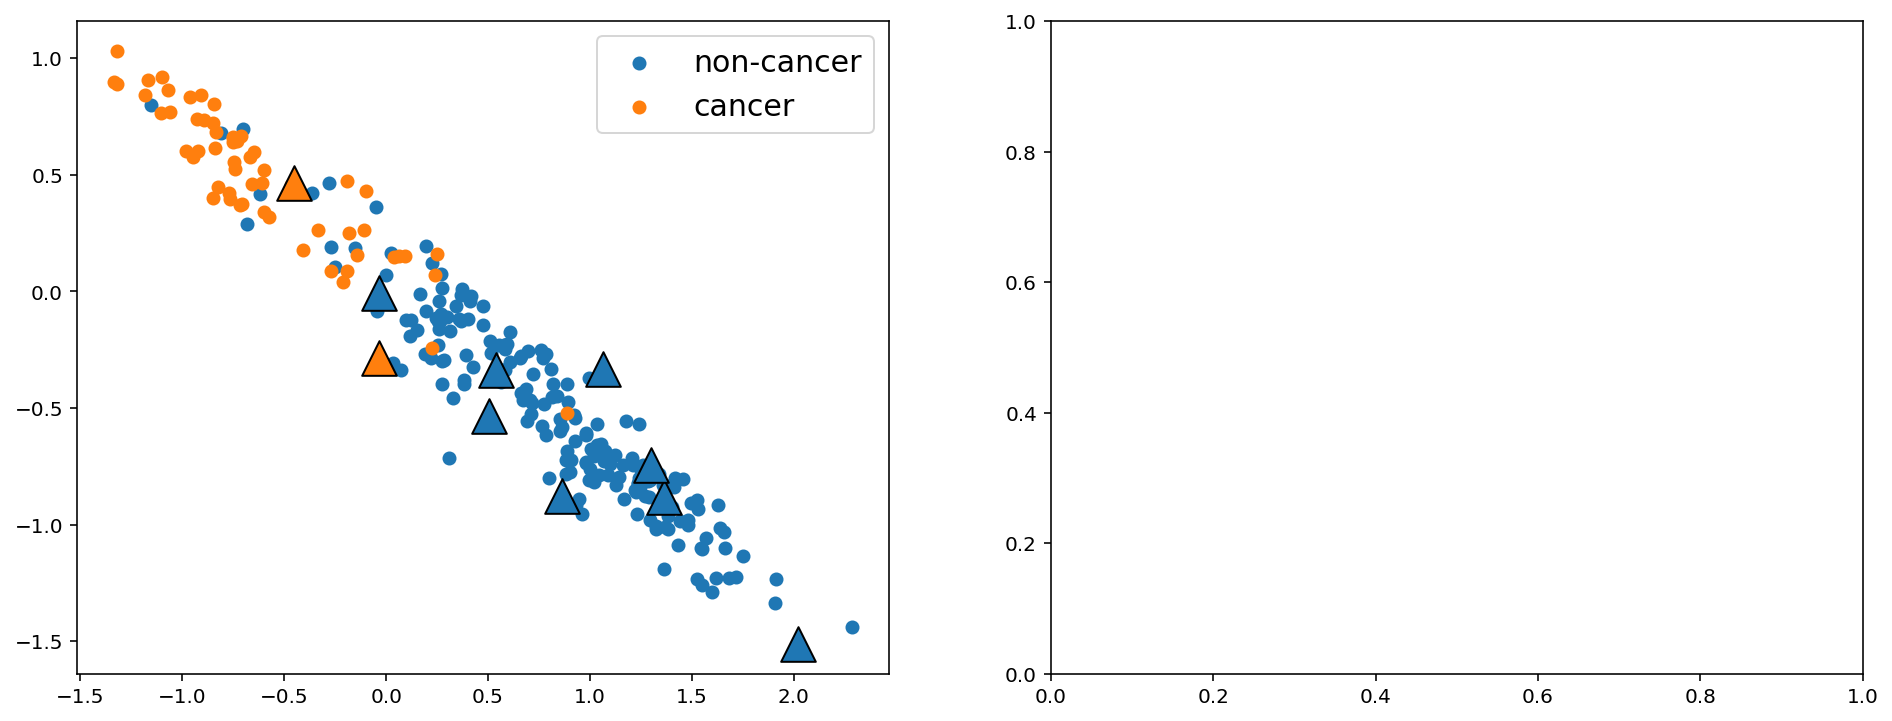

In [16]:
utils.vis_proto(x_train_dwac, y_train_dwac, examples, "")

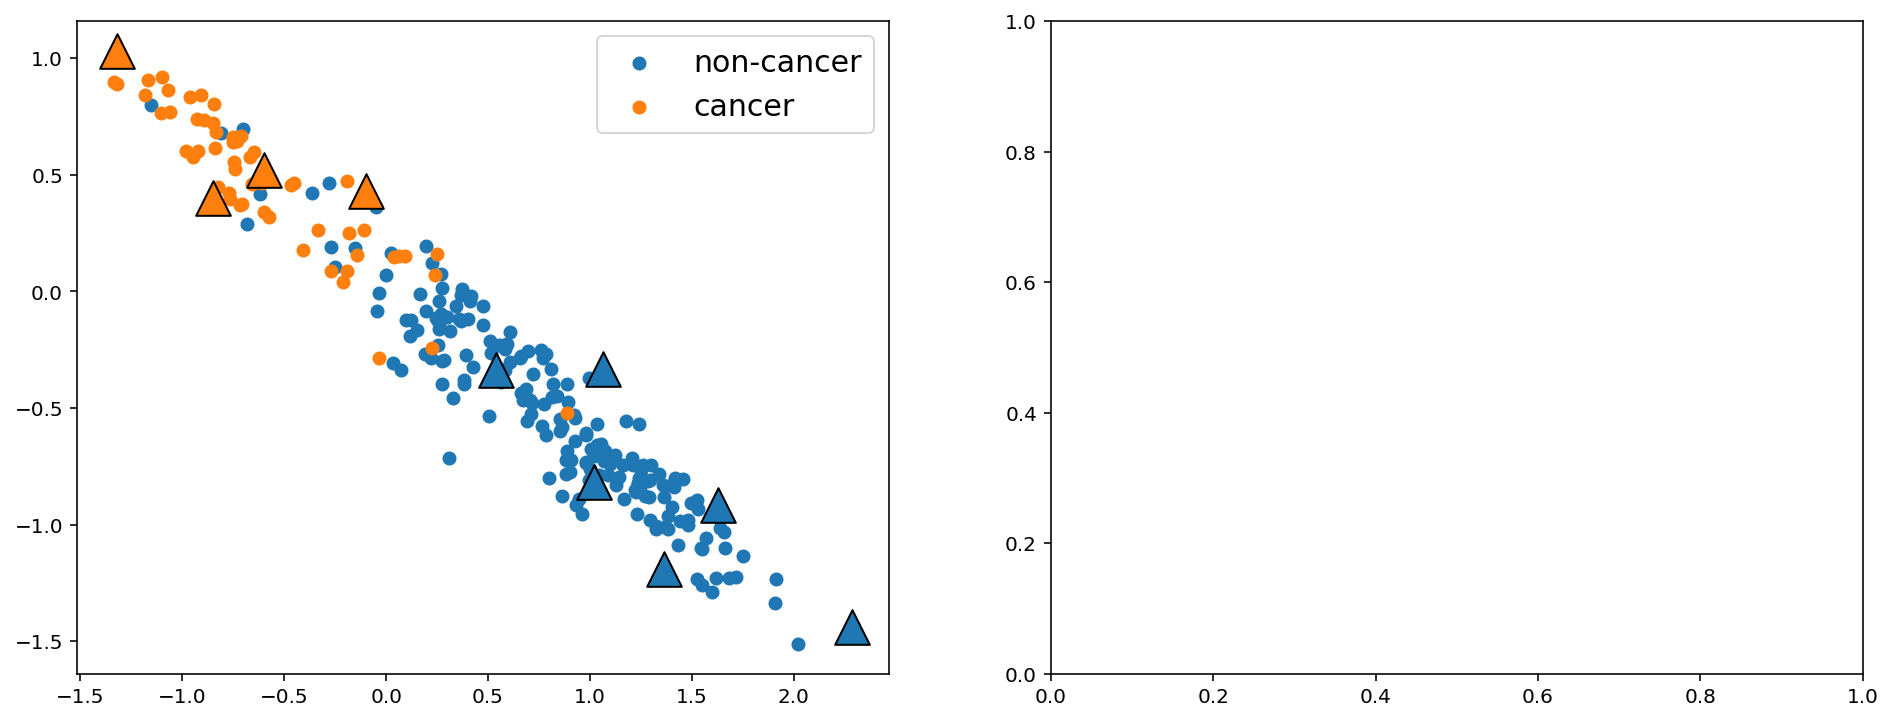

In [9]:
utils.vis_proto(x_train_dwac, y_train_dwac, pdash_examples, "")

In [10]:
L = 0.5
Kernel = 'Gaussian'
Gamma = 0.5
k_range = [1, 3]
m_range = list(range(3, 11))

In [11]:
dataset = 'prostatex'
model = 'dwac'
name = 'emb10.merged2'
train_path = 'embeds/{}_train_{}.pkl'.format(model, name)
valid_path = 'embeds/{}_valid_{}.pkl'.format(model, name)
f_train, y_train, X_train = pickle.load(open(train_path, "rb"))
f_valid, y_valid, X_valid = pickle.load(open(valid_path, "rb"))
data = X_train, y_train, X_valid, y_valid

In [12]:
dwac_f_scores_knn, dwac_f_score_svm = utils.get_full_score(data, k_range)
dwac_r_means_knn, dwac_r_confs_knn, dwac_r_means_svm, dwac_r_confs_svm = utils.get_random_score(data, k_range, m_range)
dwac_p_scores_knn, dwac_p_scores_svm = utils.get_protodash_score(data, k_range, m_range)

In [13]:
def get_pdash_score(data, k_range, m_range, f_h_scale):
    p_idss = {}
    X_train, y_train, X_valid, y_valid = data
    for m in m_range:
        if m not in p_idss:
            try:
                _, index, _ = pdash_human.pdash(X_train,X_train, m,lpips, f_h_scale=f_h_scale, kernelType="Gaussian")
            except AttributeError:
                index = [0] * m
                print("error for m={}".format(m))
            p_idss[m] = index
    p_scores_knn, p_scores_svm = [], []
    for k in k_range:
        for m in m_range:
            p_scores_knn.append(utils.get_knn_score(k, data, p_idss[m]))
            try:
                s = utils.get_svm_score(k, data, p_idss[m])
            except:
                s = 0
            p_scores_svm.append(s)
    p_scores_knn = np.array(p_scores_knn).reshape(len(k_range), len(m_range))
    p_scores_svm = np.array(p_scores_svm).reshape(len(k_range), len(m_range))
    return p_scores_knn, p_scores_svm

In [14]:
pdash_scores_knn1,pdash_scores_svm = get_pdash_score(data, k_range, m_range, 1)
pdash_scores_knn01,pdash_scores_svm = get_pdash_score(data, k_range, m_range, 0.1)
pdash_scores_knn001,pdash_scores_svm = get_pdash_score(data, k_range, m_range, 0.01)
pdash_scores_knn0001,pdash_scores_svm = get_pdash_score(data, k_range, m_range, 0.001)
pdash_scores_knn00001,pdash_scores_svm = get_pdash_score(data, k_range, m_range, 0.00001)

Text(0.5, 0.98, 'prostatex, dwac.lpips, AUC, KNN weights uniform')

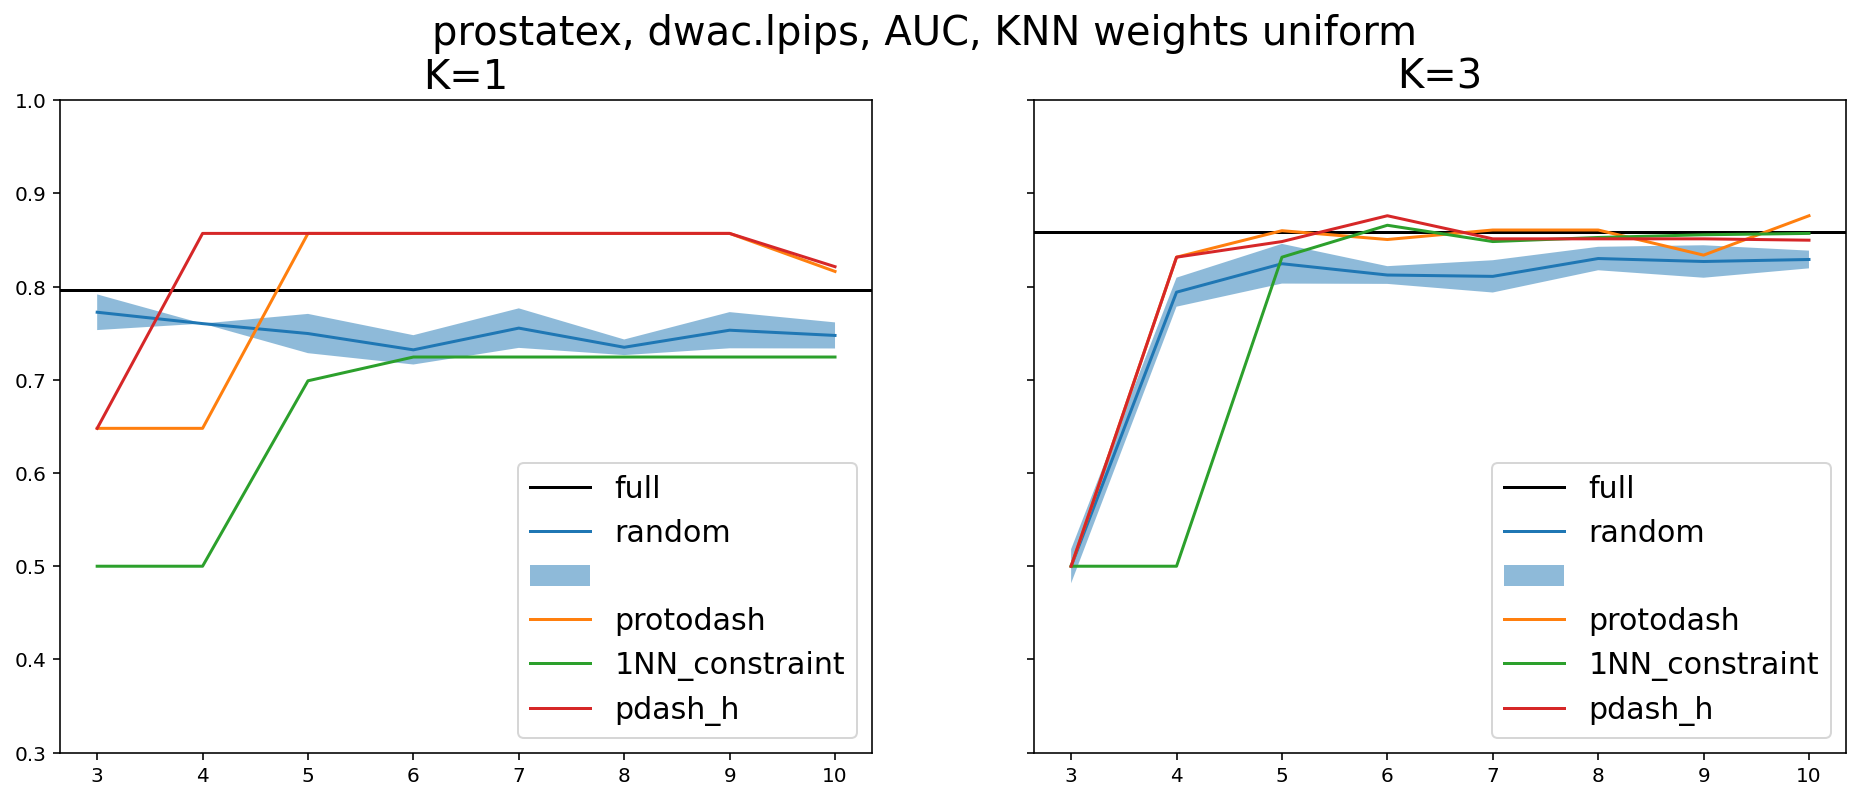

In [33]:
fig, ax = plt.subplots(1, len(k_range), figsize=(16, 6), sharey=True)
for k in range(len(k_range)):
    ax[k].axhline(dwac_f_scores_knn[k], c='black')
    ax[k].plot(m_range, dwac_r_means_knn[k])
    ax[k].fill_between(m_range, dwac_r_means_knn[k] + dwac_r_confs_knn[k] / 2, dwac_r_means_knn[k] - dwac_r_confs_knn[k] / 2, alpha=0.5)
    ax[k].plot(m_range, dwac_p_scores_knn[k])
    # ax[k].plot(m_range, pdash_scores_knn1[k])
    ax[k].plot(m_range, pdash_scores_knn01[k])
    ax[k].plot(m_range, pdash_scores_knn001[k])
    # ax[k].plot(m_range, pdash_scores_knn0001[k])
    # ax[k].plot(m_range, pdash_scores_knn00001[k])
    ax[k].set_ylim(0.3, 1)
    ax[k].set_xticks(m_range)
    ax[k].set_title('K={}'.format(k_range[k]))
    ax[k].legend(['full', 'random', '', 'protodash', '1NN_constraint', 'pdash_h','0.0001'])
fig.suptitle('{}, {}.{}, AUC, KNN weights '.format(dataset, model, "lpips") + "uniform")

## generate triplets from LPIPS distance matrices
triplets.shape := [k, 3]

triplets[i] = [anchor, positive, negative]

In [3]:
distance_matrix = pickle.load(open("lpips.prostatex.train+valid.pkl", "rb"))
distance_matrix.shape

(319, 319)

In [4]:
triplets_fname = "data/triplets.px.train+valid.pkl"
tste_fname = "data/tste.px.train+valid.pkl"

In [5]:
# embeds = utils.get_tste(distance_matrix, triplets_fname, tste_fname, max_iter=100)

(256, 2)

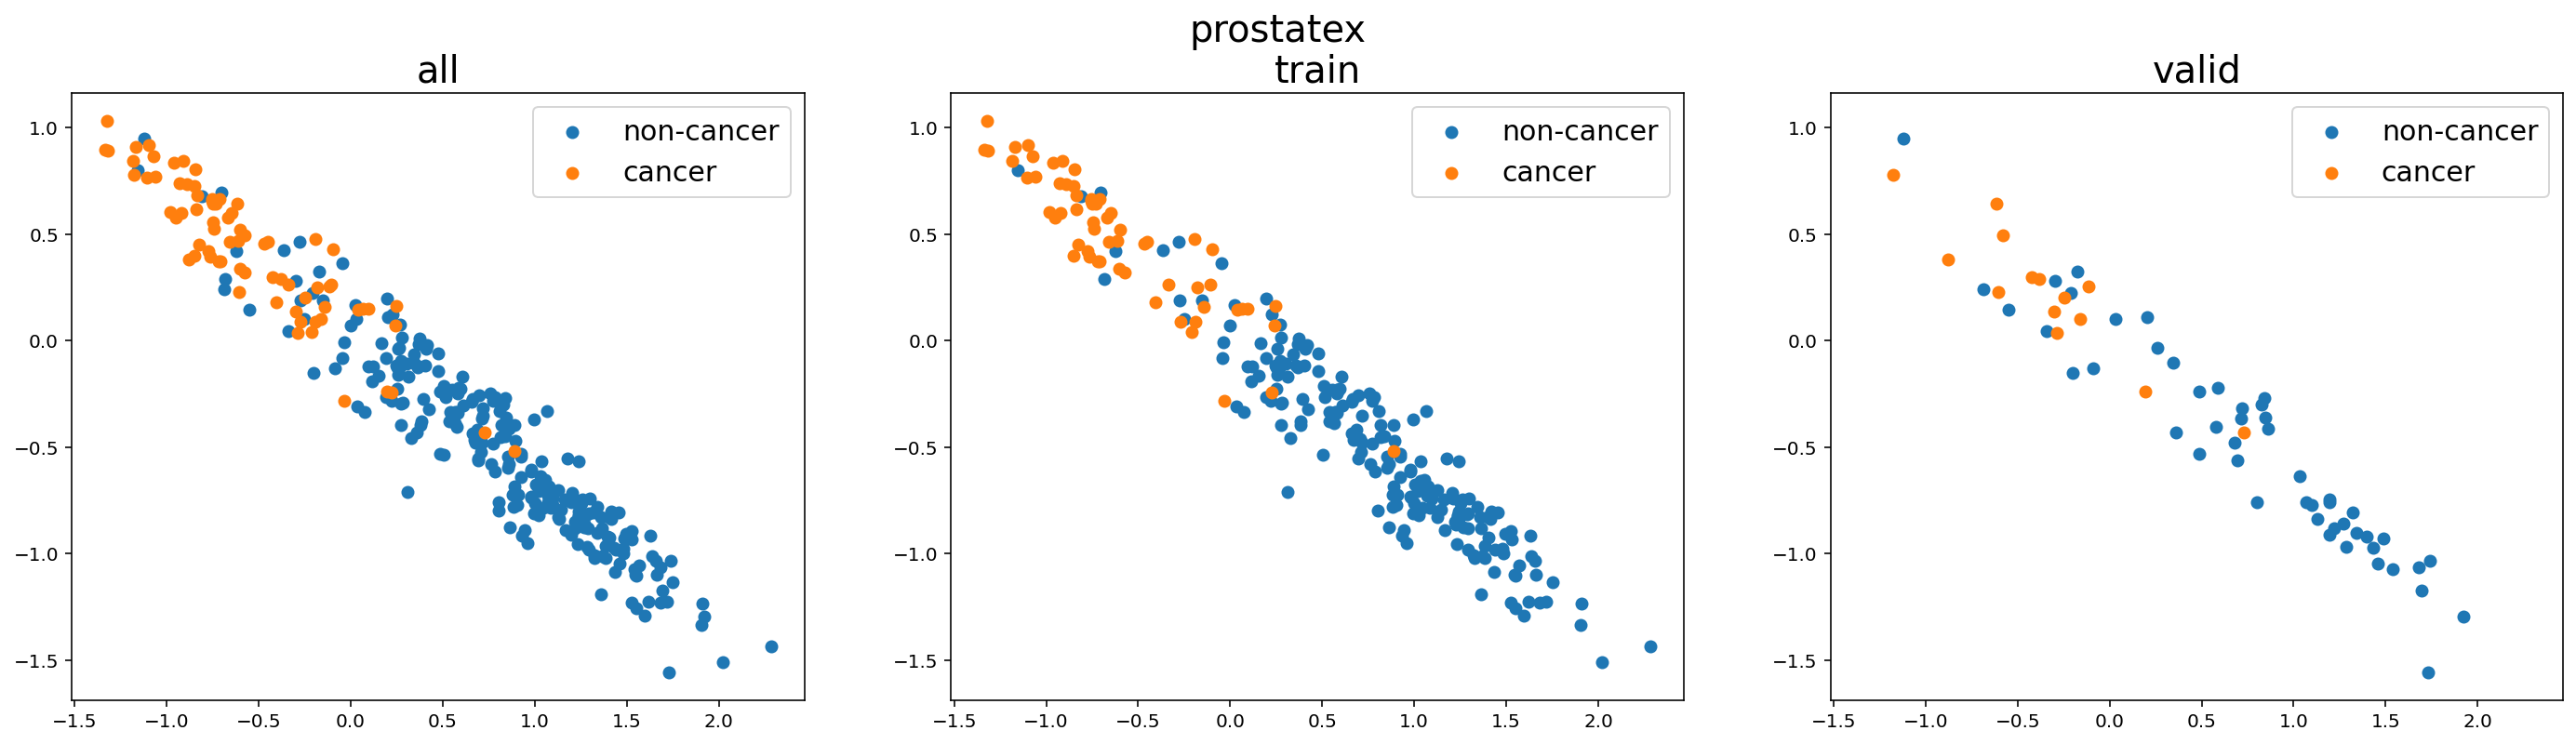

In [3]:
model, name = 'dwac', 'emb10.merged2'
title = "prostatex"

train_path = '{}_train_{}.pkl'.format(model, name)
f_train_dwac, y_train_dwac, x_train_dwac = pickle.load(open(train_path, "rb"))
valid_path = '{}_valid_{}.pkl'.format(model, name)
f_valid_dwac, y_valid_dwac, x_valid_dwac = pickle.load(open(valid_path, "rb"))
vis_data(x_train_dwac, y_train_dwac, x_valid_dwac, y_valid_dwac, title, save=False)
x_train_dwac.shape

(256, 2)

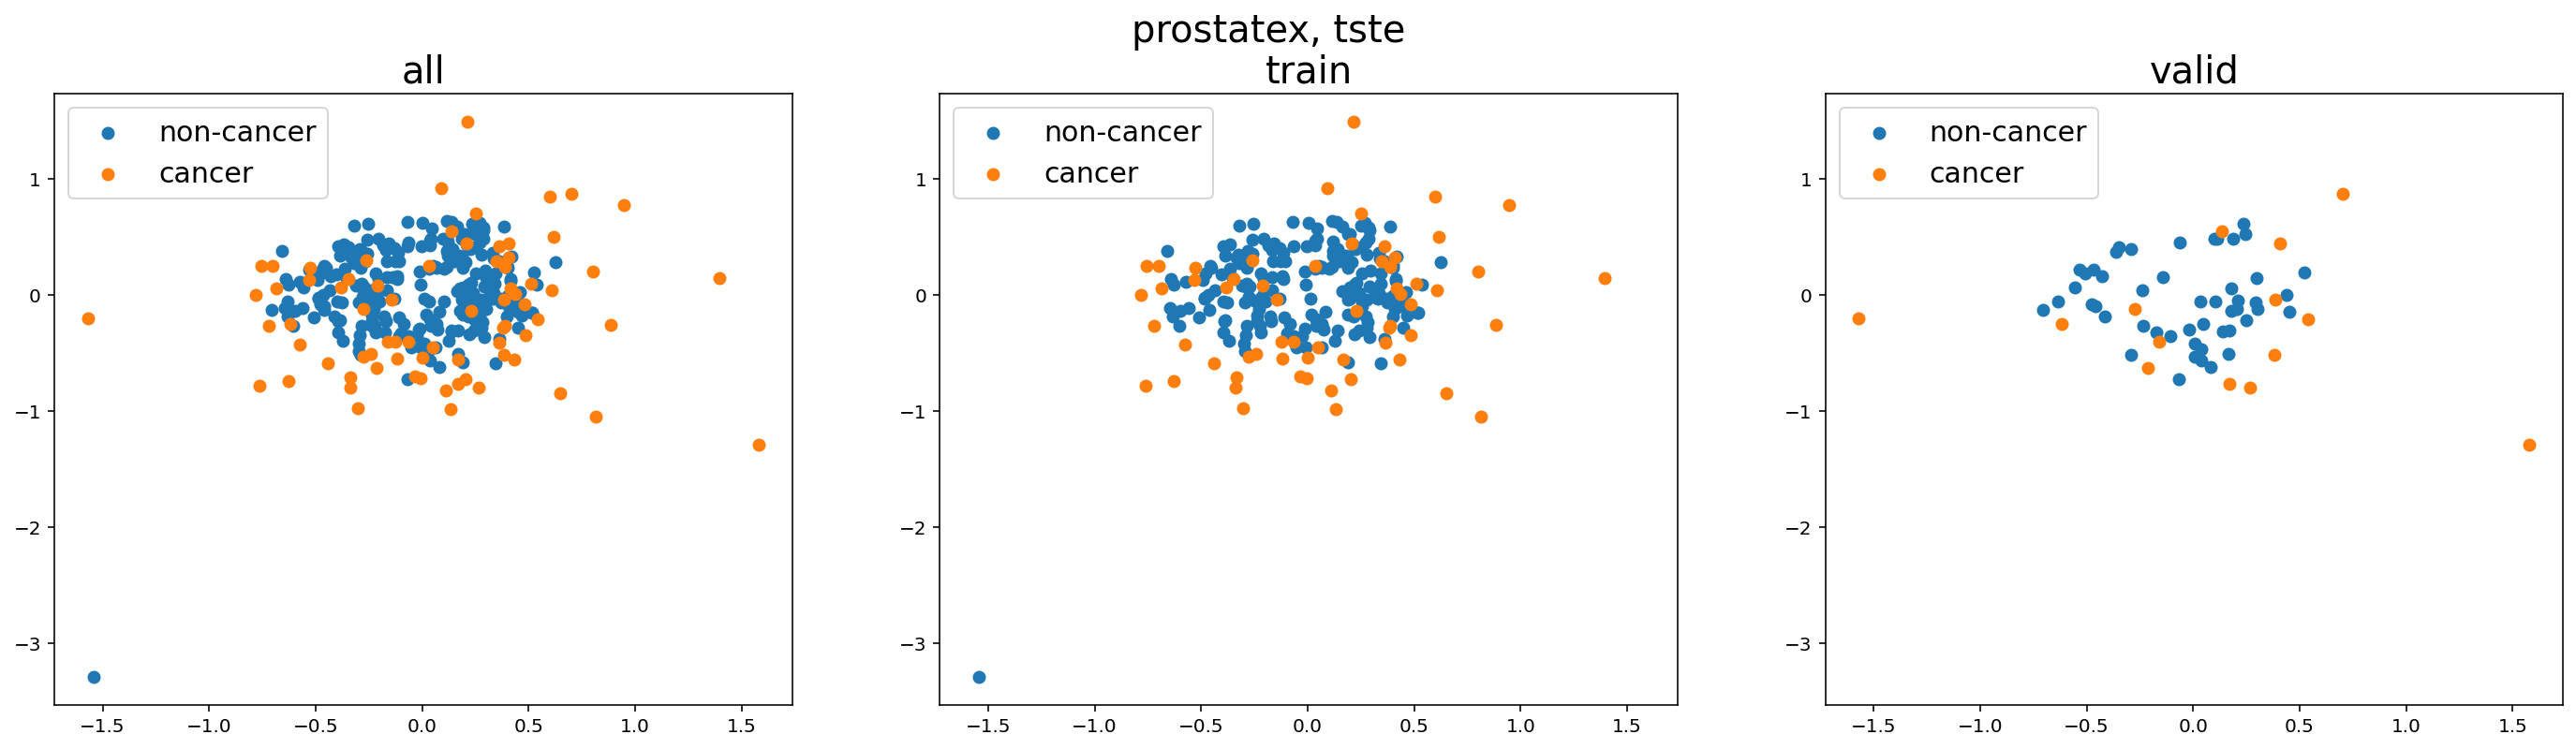

In [5]:
title = "prostatex, tste"
model, name = "tste", "px"

train_path = '{}_train_{}.pkl'.format(model, name)
f_train_tste, y_train_tste, x_train_tste = pickle.load(open(train_path, "rb"))
valid_path = '{}_valid_{}.pkl'.format(model, name)
f_valid_tste, y_valid_tste, x_valid_tste = pickle.load(open(valid_path, "rb"))
vis_data(x_train_tste, y_train_tste, x_valid_tste, y_valid_tste, title, save=False)
x_train_tste.shape

(319, 2)

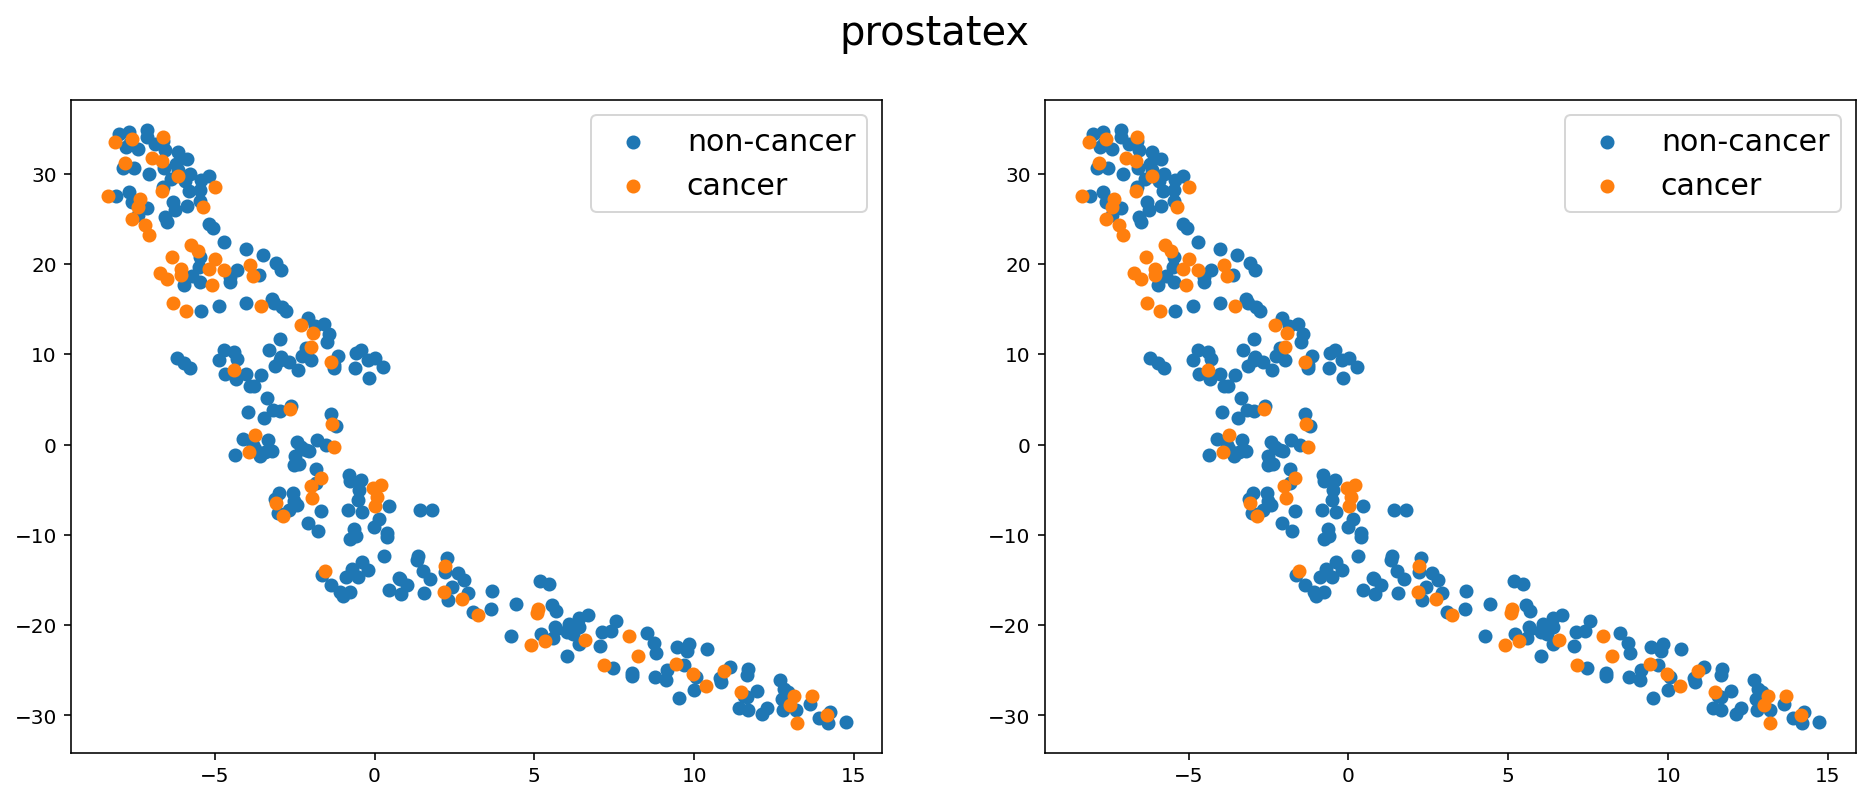

In [48]:
x_snack = np.load("embeds/snack_dwac+lpips.npy")
y_snack_path = "embeds/tste_all_px.pkl"
y_snack = pickle.load(open(y_snack_path, "rb"))[1]
assert (x_snack.shape[0]==y_snack.shape[0])
vis_data_all(x_snack, y_snack, title, save=False)
x_snack.shape

## knn/svm on tste embeds

In [7]:
L = 0.5
Kernel = 'Gaussian'
Gamma = 0.5

k_range = [1, 3]
m_range = list(range(3, 11))

In [8]:
dataset = 'prostatex'
model = 'dwac'
name = 'emb10.merged2'
train_path = '{}_train_{}.pkl'.format(model, name)
valid_path = '{}_valid_{}.pkl'.format(model, name)
f_train, y_train, X_train = pickle.load(open(train_path, "rb"))
f_valid, y_valid, X_valid = pickle.load(open(valid_path, "rb"))
data = X_train, y_train, X_valid, y_valid

In [9]:
dwac_f_scores_knn, dwac_f_score_svm = utils.get_full_score(data, k_range)
dwac_r_means_knn, dwac_r_confs_knn, dwac_r_means_svm, dwac_r_confs_svm = utils.get_random_score(data, k_range, m_range)
dwac_p_scores_knn, dwac_p_scores_svm = utils.get_protodash_score(data, k_range, m_range)

Text(0.5, 0.98, 'prostatex, dwac.emb10.merged2, AUC, KNN weights uniform')

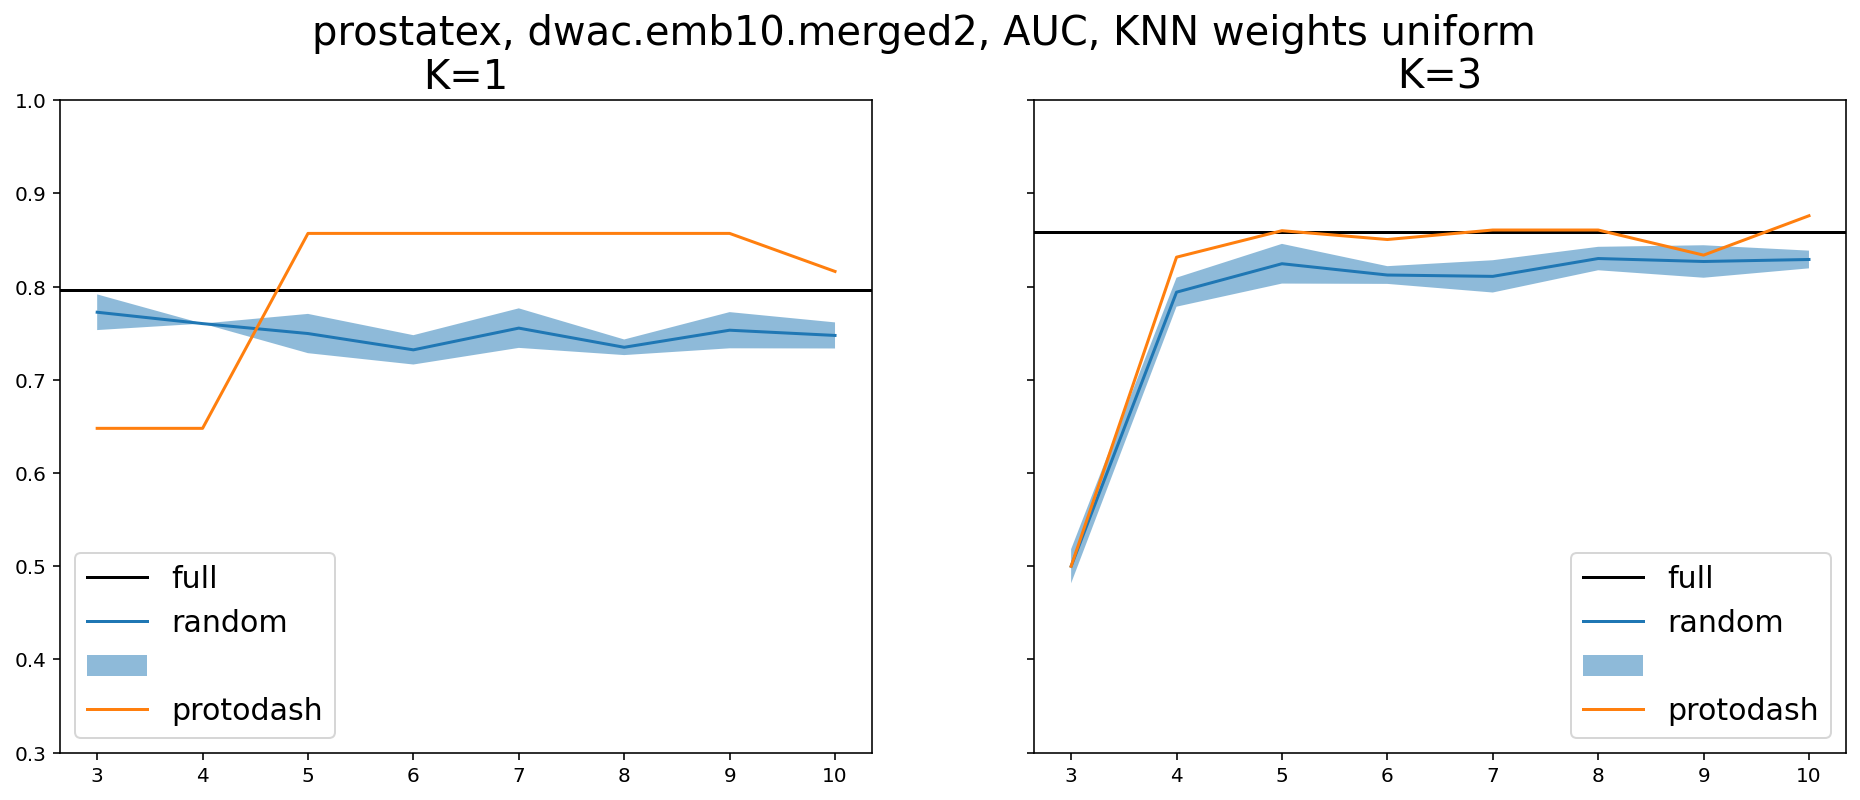

In [10]:
fig, ax = plt.subplots(1, len(k_range), figsize=(16, 6), sharey=True)
for k in range(len(k_range)):
    ax[k].axhline(dwac_f_scores_knn[k], c='black')
    ax[k].plot(m_range, dwac_r_means_knn[k])
    ax[k].fill_between(m_range, dwac_r_means_knn[k] + dwac_r_confs_knn[k] / 2, dwac_r_means_knn[k] - dwac_r_confs_knn[k] / 2, alpha=0.5)
    ax[k].plot(m_range, dwac_p_scores_knn[k])
    ax[k].set_ylim(0.3, 1)
    ax[k].set_xticks(m_range)
    ax[k].set_title('K={}'.format(k_range[k]))
    ax[k].legend(['full', 'random', '', 'protodash', 'pdash_e', 'proto_g', 'protoclass', 'lpips'])
fig.suptitle('{}, {}.{}, AUC, KNN weights '.format(dataset, model, name) + "uniform")

In [11]:
model= "tste"
train_path = '{}_train_px.pkl'.format(model)
valid_path = '{}_valid_px.pkl'.format(model)
f_train_tste, y_train_tste, x_train_tste = pickle.load(open(train_path, "rb"))
f_valid_tste, y_valid_tste, x_valid_tste = pickle.load(open(valid_path, "rb"))

data = x_train_tste, y_train_tste, x_valid_tste, y_valid_tste

In [12]:
tste_f_scores_knn, tste_f_score_svm = utils.get_full_score(data, k_range)
tste_r_means_knn, tste_r_confs_knn, tste_r_means_svm, tste_r_confs_svm = utils.get_random_score(data, k_range, m_range)
tste_p_scores_knn, tste_p_scores_svm = utils.get_protodash_score(data, k_range, m_range)

Text(0.5, 0.98, 'prostatex, tste, AUC, KNN weights uniform')

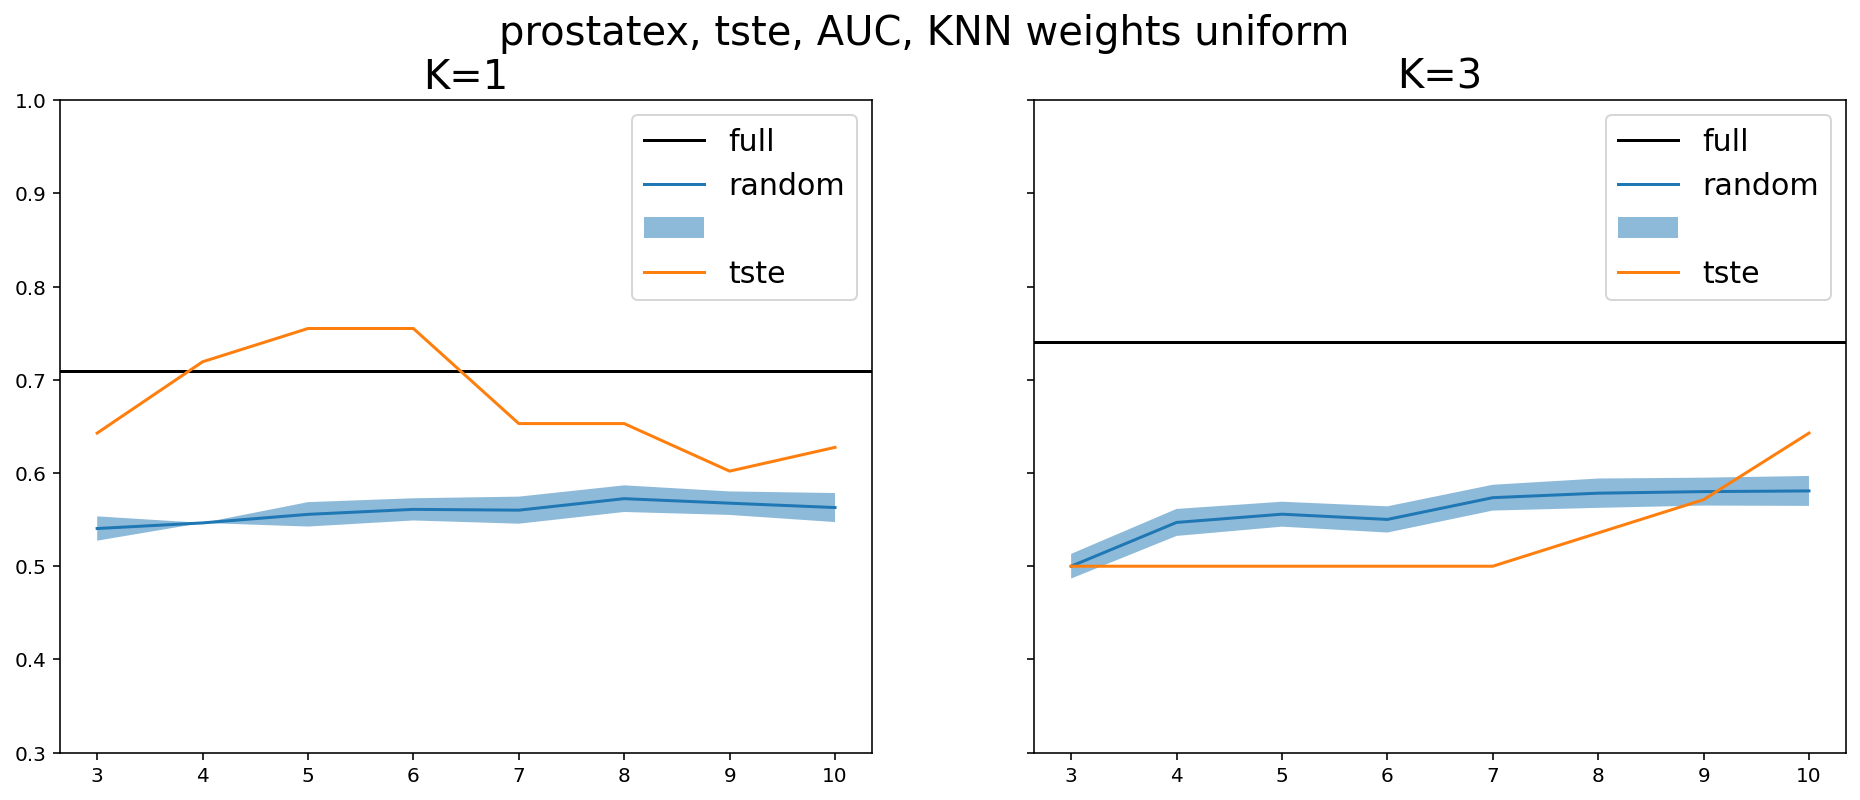

In [14]:
fig, ax = plt.subplots(1, len(k_range), figsize=(16, 6), sharey=True)
for k in range(len(k_range)):
    ax[k].axhline(tste_f_scores_knn[k], c='black')
    ax[k].plot(m_range, tste_r_means_knn[k])
    ax[k].fill_between(m_range, tste_r_means_knn[k] + tste_r_confs_knn[k] / 2, tste_r_means_knn[k] - tste_r_confs_knn[k] / 2, alpha=0.5)
    ax[k].plot(m_range, tste_p_scores_knn[k])
    ax[k].set_ylim(0.3, 1)
    ax[k].set_xticks(m_range)
    ax[k].set_title('K={}'.format(k_range[k]))
    ax[k].legend(['full', 'random', "", 'tste', 'pdash_e', 'proto_g', 'protoclass', 'lpips'])
fig.suptitle('{}, {}, AUC, KNN weights '.format(dataset, model) + "uniform")

Text(0.5, 0.98, 'prostatex, dwac vs tste, AUC, KNN weights uniform')

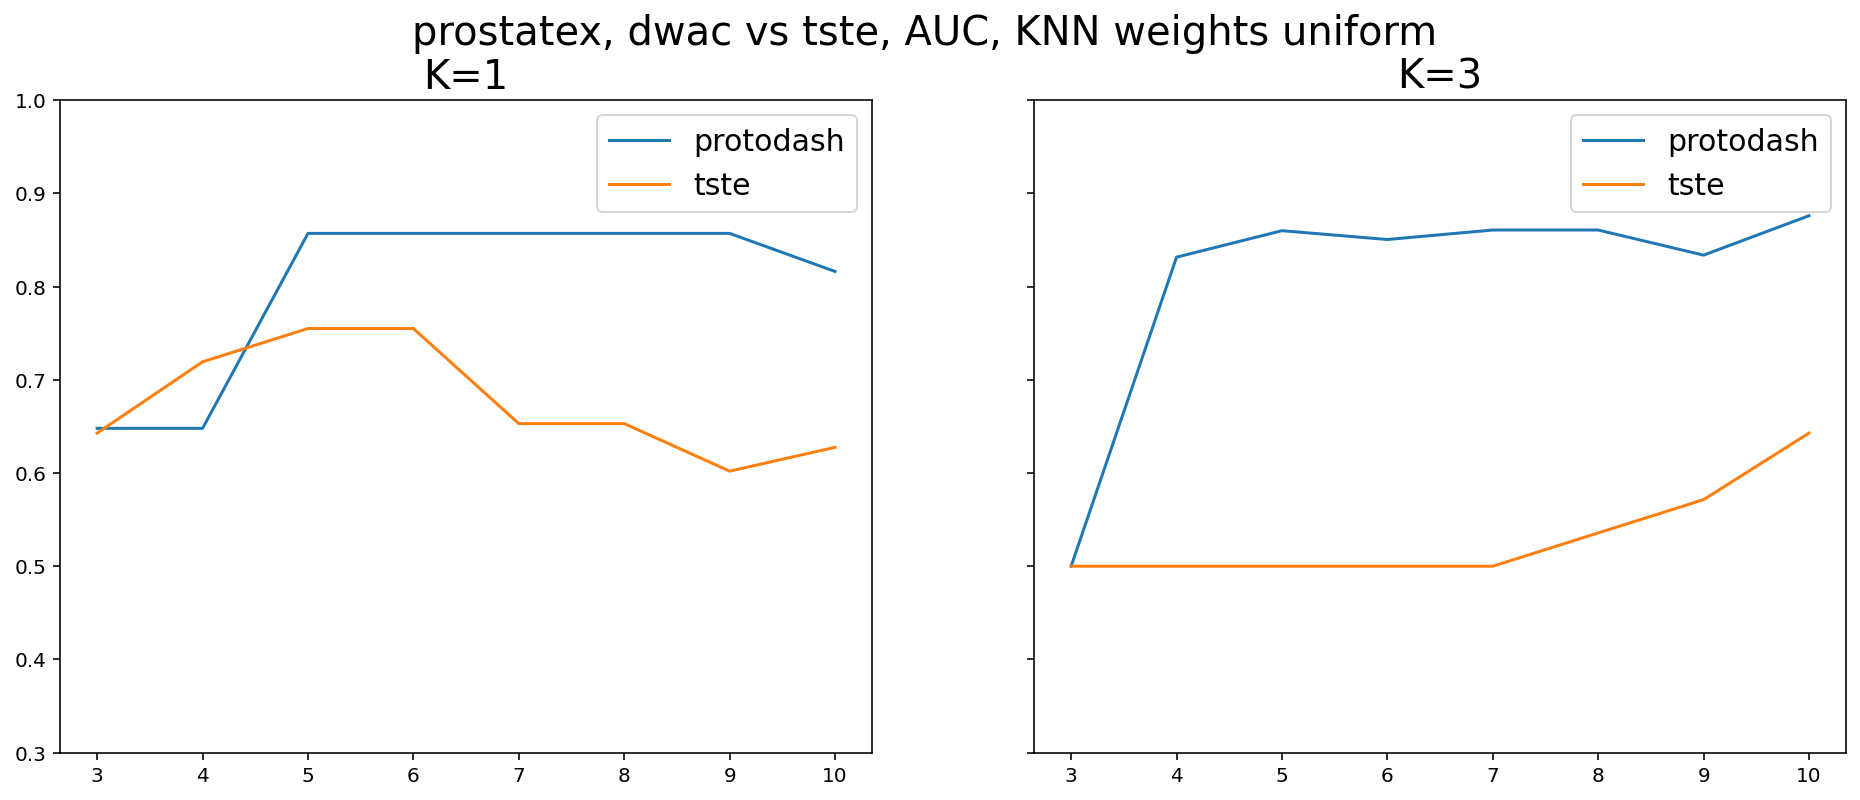

In [13]:
fig, ax = plt.subplots(1, len(k_range), figsize=(16, 6), sharey=True)
for k in range(len(k_range)):
    ax[k].plot(m_range, dwac_p_scores_knn[k])
    ax[k].plot(m_range, tste_p_scores_knn[k])
    ax[k].set_ylim(0.3, 1)
    ax[k].set_xticks(m_range)
    ax[k].set_title('K={}'.format(k_range[k]))
    ax[k].legend(['protodash', 'tste'])
fig.suptitle('{}, dwac vs tste, AUC, KNN weights uniform'.format(dataset))